In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.utils import shuffle

In [10]:
df = pd.read_excel('temperature_data.xlsx') 

In [11]:
df.head(5)

,Flight Number,Launch Temperature,Damage to O-ring
0,STS 1,66,0
1,STS 2,70,1
2,STS 3,69,0
3,STS 4,80,0
4,STS 5,68,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Flight Number       24 non-null     object
 1   Launch Temperature  24 non-null     int64 
 2   Damage to O-ring    24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 708.0+ bytes


In [15]:
df['Damage to O-ring'].value_counts()

0    17
1     7
Name: Damage to O-ring, dtype: int64

In [16]:
# from sklearn.utils import shuffle
# df = shuffle(df)

In [17]:
# # Assigning list of all column names in the DataFrame
# X_features = list(df.columns)
# # Remove the response variable from the list
# X_features.remove('Damage to O-ring')
# X_features.remove('Flight Number')
# X_features

In [19]:
X = df['Launch Temperature']
y = df['Damage to O-ring']

X = np.array(X).reshape(-1,1)

In [20]:
from sklearn.linear_model import LogisticRegression

# Initializing the model

model = LogisticRegression()

# Fitting the model with X and Y values of the dataset

model.fit(X,y)

LogisticRegression()

In [21]:
pred_y = model.predict(X)

In [22]:
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [23]:
model.predict_proba(X)

array([[0.57102623, 0.42897377],
       [0.77197036, 0.22802964],
       [0.72831943, 0.27168057],
       [0.97216005, 0.02783995],
       [0.67977869, 0.32022131],
       [0.62700679, 0.37299321],
       [0.84372193, 0.15627807],
       [0.87208756, 0.12791244],
       [0.77197036, 0.22802964],
       [0.14013361, 0.85986639],
       [0.39794525, 0.60205475],
       [0.77197036, 0.22802964],
       [0.95632545, 0.04367455],
       [0.62700679, 0.37299321],
       [0.06022167, 0.93977833],
       [0.62700679, 0.37299321],
       [0.9157735 , 0.0842265 ],
       [0.77197036, 0.22802964],
       [0.97782589, 0.02217411],
       [0.93211349, 0.06788651],
       [0.96509817, 0.03490183],
       [0.9157735 , 0.0842265 ],
       [0.93211349, 0.06788651],
       [0.17067898, 0.82932102]])

### Performance Metrics

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y,pred_y))

[[17  0]
 [ 3  4]]


In [26]:
print(classification_report(y,pred_y))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.57      0.73         7

    accuracy                           0.88        24
   macro avg       0.93      0.79      0.82        24
weighted avg       0.89      0.88      0.86        24



In [27]:
metrics.accuracy_score(y, pred_y)

0.875

In [28]:
auc = metrics.roc_auc_score(y, model.predict_proba(X)[:,1])
auc

0.7941176470588235

### Drawing the RoC Curve

In [29]:
from sklearn import metrics

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y,model.decision_function(X))

In [31]:
roc_auc = metrics.auc(fpr, tpr)

NameError: name 'plt' is not defined

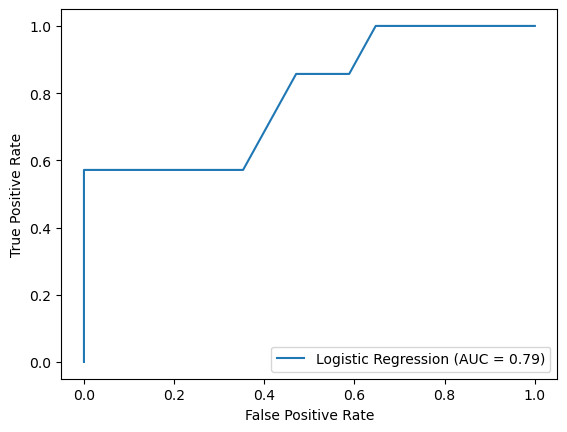

In [32]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression')
display.plot()
plt.show()

In [ ]:
thresholds

array([ 3.74761178,  2.74761178,  0.41403396, -0.28603938, -0.51939717,
       -0.98611273, -1.21947051, -1.91954386, -2.38625942, -2.6196172 ,
       -3.78640611])